## Edge
When there's a sharp change in the intensity

In [9]:
# Necessary imports
import os
import pathlib
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# Set the path to image directory
cwd = pathlib.Path().absolute()
cwd_parent = cwd.parent.absolute()
print('Parent path: ', cwd_parent)

image_dir = None

if 'images' in os.listdir(cwd_parent):
    image_dir = f'{cwd_parent}/images'

msg = 'images path found!' if os.path.isdir(image_dir) else 'BAD! images path not found!'
print(msg)
print(image_dir)

'''
NOTE: After cloning, change the paths according to your file system.
'''


Parent path:  /Users/hanzy/Documents/Tuni/ML_Learning/CV
images path found!
/Users/hanzy/Documents/Tuni/ML_Learning/CV/images


'\nNOTE: When cloning, change the paths according to your file system.\n'

Image read succussfully!


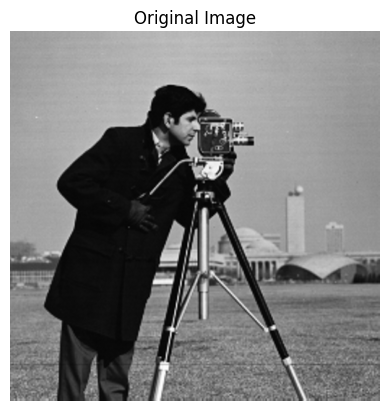

In [38]:
filename = "cameraman.tif"
filepath = f"{image_dir}/standard_test_images/{filename}"

img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

print("Image read succussfully!")

plt.imshow(img, cmap="gray")
plt.axis('off')
plt.title('Original Image')
plt.show()

In [50]:
# Sobel for vertical edges (dx=1, dy=0)
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)

# Sobel for vertical edges (dx=0, dy=1)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# Compute the magnitude of gradients (optional)
sobel_combined = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_combined = cv2.convertScaleAbs(sobel_combined)  # Convert to uint8 for display

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

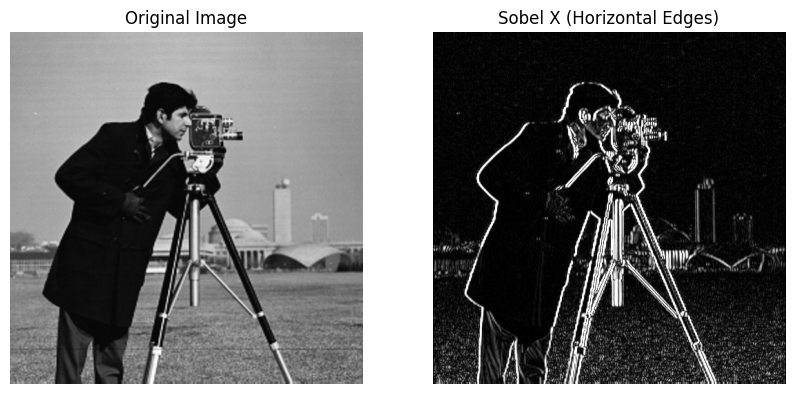

In [49]:
# Display Original Image with Horizontal Sobel Operator

plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.convertScaleAbs(sobel_x), cmap='gray')
plt.title('Sobel X (Horizontal Edges)')
plt.axis('off')

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

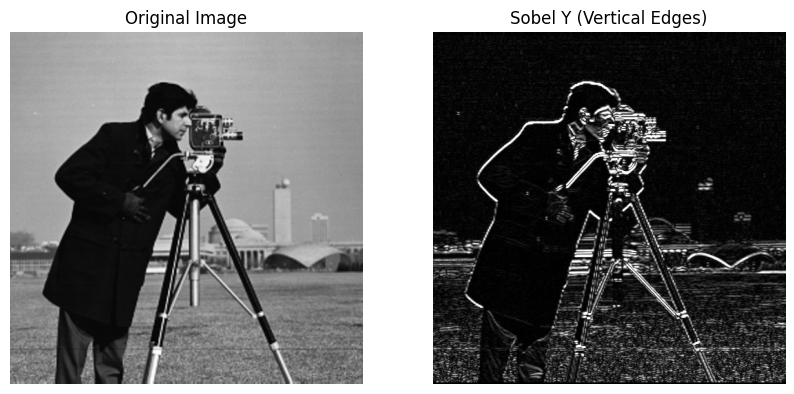

In [48]:
# Display Original Image with Vertical Sobel Operator

plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.convertScaleAbs(sobel_y), cmap='gray')
plt.title('Sobel Y (Vertical Edges)')
plt.axis('off')

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

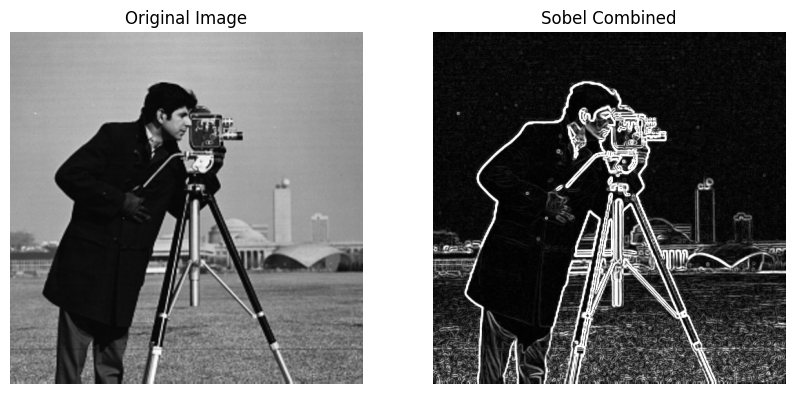

In [46]:
# Display Original Image with combined Sobel Operator Result

plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Combined')
plt.axis('off')

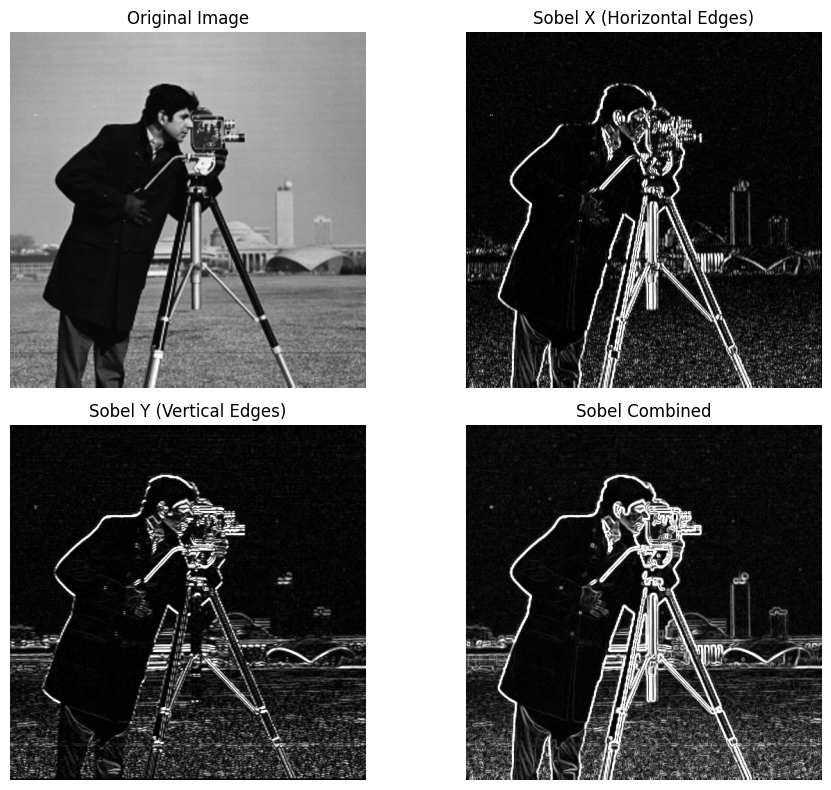

In [47]:
# Display all results combined

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv2.convertScaleAbs(sobel_x), cmap='gray')
plt.title('Sobel X (Horizontal Edges)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(cv2.convertScaleAbs(sobel_y), cmap='gray')
plt.title('Sobel Y (Vertical Edges)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Combined')
plt.axis('off')

plt.tight_layout()
plt.show()